<a href="https://colab.research.google.com/github/lletridung/baitapai/blob/main/Hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Flower/'

In [ ]:
from os import listdir
from os.path import isdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/Flower/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('hoahong '):
    output = 1
  if file.startswith('hoahuongduong '):
    output = 2
  if file.startswith('hoamai '):
    output = 3
  if file.startswith('hoasen '):
    output = 4
  if file.startswith('hoaviolet '):
    output = 5
  img =load_img(folder+file,target_size=(30,40))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('hoa_photos.npy',photos)
save('hoa_labels.npy',labels)

(150, 30, 40, 3) (150,)


In [ ]:
x_train = np.load('/content/hoa_photos.npy')
y_train = np.load('/content/hoa_labels.npy')

In [ ]:
print(x_train.shape)
print(y_train.shape)

(150, 30, 40, 3)
(150,)


In [ ]:
x_train = x_train.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(30,40,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(LeakyReLU(alpha=0.1))

model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(LeakyReLU(alpha=0.1))
#model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(LeakyReLU(alpha=0.1))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,batch_size=5,epochs = 20,verbose = 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 40, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 20, 32)       0         
 )                                                               
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 15, 20, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                             
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 10, 64)         0

1/1 [==============================] - 1s 557ms/step


'Hoa hong'

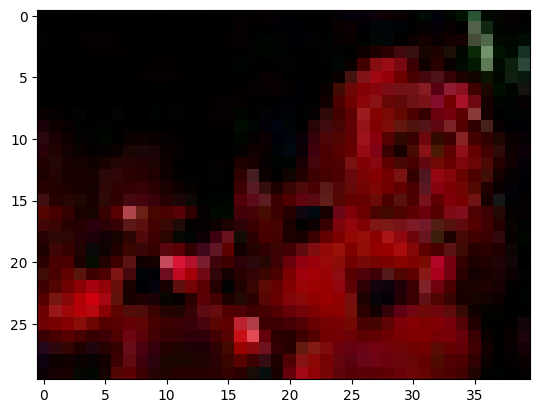

In [ ]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'Hoa hong',2:'Hoa huong duong', 3:'Hoa mai', 4:'Hoa sen', 5:'Hoa violet'}
img = load_img("/content/drive/MyDrive/Flower/hoahong (10).jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]